In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [251]:
sns.set_style('whitegrid')

## Latar Belakang

Produktifitas perusahaan akan terganggu ketika karyawan pergi meninggalkan perusahaan. Karyawan baru / pengganti cenderung memiliki performa kerja yang kurang kurang maksimal ketika mempelajari pekerjaan yang baru. Perusahaan akan dibebankan dengan pengeluaran tambahan dalam melakukan pencarian serta pelatihan untuk karyawan baru. Ketika karyawan yang memiliki kemampuan yang sangat baik keluar dari perusahaan, maka perusahaan tersebut akan mengalami beberapa kerugian,yaitu dengan turunnya produktifitas serta adanya pengeluaran tambahan.

## Tujuan

- Membuat model untuk memprediksi apakah karyawan tersebut akan mengajukan resign atau tidak.
- Dengan mengetahui hal tersebut, perusahaan akan dapat melakukan penanganan lebih cepat untuk mengurangi resiko kerugian

In [252]:
df = pd.read_csv('employee.csv')

## Deskripsi Data

In [253]:
desc = []

for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (df[i].isna().sum()/len(df)*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=desc, columns=['Nama Kolom','Tipe Kolom','Jumlah NaN','Presentase NaN','Jumlah Data Unik','Sampel Data Unik'])

,Nama Kolom,Tipe Kolom,Jumlah NaN,Presentase NaN,Jumlah Data Unik,Sampel Data Unik
0,EmployeeID,int64,0,0.0,6284,"[5036, 3831]"
1,recorddate_key,object,0,0.0,130,"[10/1/2008 0:00, 7/1/2007 0:00]"
2,birthdate_key,object,0,0.0,5342,"[1/7/1991, 3/9/1949]"
3,orighiredate_key,object,0,0.0,4415,"[11/13/1996, 1/19/2006]"
4,terminationdate_key,object,0,0.0,1055,"[3/16/2009, 8/18/2014]"
5,age,int64,0,0.0,47,"[33, 30]"
6,length_of_service,int64,0,0.0,27,"[24, 7]"
7,city_name,object,0,0.0,40,"[Kamloops, Nelson]"
8,department_name,object,0,0.0,21,"[Executive, Investment]"
9,job_title,object,0,0.0,47,"[Accounting Clerk, Store Manager]"


In [254]:
print(f'Data terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom. Tidak ada NULL dalam dataset.')

Data terdiri dari 49653 baris dan 18 kolom. Tidak ada NULL dalam dataset.


In [255]:
print(f'Dari dataset tersebut terdapat karyawan berstatus ACTIVE dan TERMINATED')
for i in df['STATUS'].unique():
    print(f'Karyawan berstatus {i}, berjumlah {df[df.STATUS == i].shape[0]} orang')

Dari dataset tersebut terdapat karyawan berstatus ACTIVE dan TERMINATED
Karyawan berstatus ACTIVE, berjumlah 48168 orang
Karyawan berstatus TERMINATED, berjumlah 1485 orang


In [256]:
print(f'Karyawan berstatus TERMINATED memiliki tipe resign yang berbeda')
print()
for i in df[df.STATUS == 'TERMINATED']['termtype_desc'].unique():
    print(f'Karyawan dengan tipe resign {i}, berjumlah {df[df.termtype_desc == i].shape[0]} orang')
    for j in df[(df.STATUS == 'TERMINATED') & (df.termtype_desc == i)]['termreason_desc'].unique():
        print(f'Karyawan dengan alasan pemberhentian {j}, berjumlah {df[df.termreason_desc == j].shape[0]} orang')
    print()

Karyawan berstatus TERMINATED memiliki tipe resign yang berbeda

Karyawan dengan tipe resign Voluntary, berjumlah 1270 orang
Karyawan dengan alasan pemberhentian Retirement, berjumlah 885 orang
Karyawan dengan alasan pemberhentian Resignaton, berjumlah 385 orang

Karyawan dengan tipe resign Involuntary, berjumlah 215 orang
Karyawan dengan alasan pemberhentian Layoff, berjumlah 215 orang



Dikarenakan ada karyawan yang berhenti tanpa melakukan pengajuan (LayOff) maka data karyawan yang LayOff akan didrop. Karena fokus permasalahan adalah memprediksi karyawan yang akan **mengajukan** resign.

In [257]:
df = df[df.termreason_desc != 'Layoff']

### Sebaran Umur Karyawan

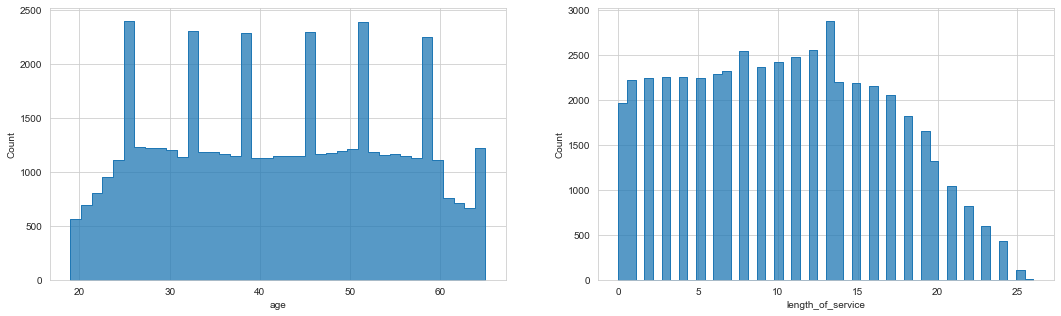

In [258]:
f,axs = plt.subplots(1,2,figsize=(18,5))
sns.histplot(x=df['age'],ax=axs[0],element='step')
sns.histplot(x=df['length_of_service'],ax=axs[1],element='step')

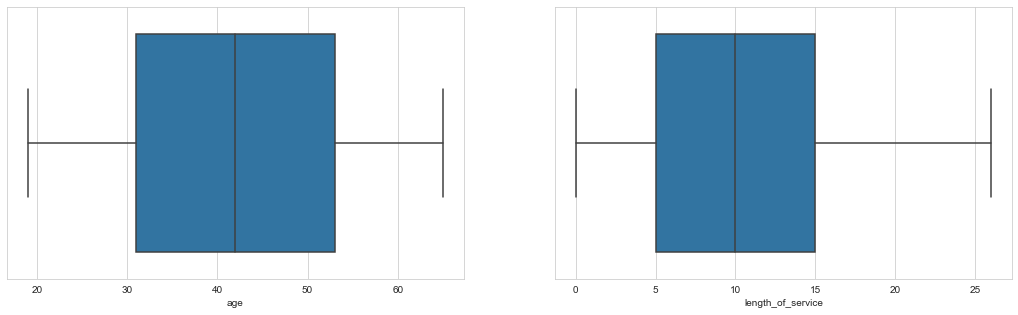

In [259]:
f,axs = plt.subplots(1,2,figsize=(18,5))
sns.boxplot(x=df['age'],ax=axs[0])
sns.boxplot(x=df['length_of_service'],ax=axs[1])

In [260]:
print(f'Rata-rata umur karyawan adalah {round(df.age.mean(),2)} tahun')
print(f'Rata-rata lama bekerja karyawan adalah {round(df.length_of_service.mean(),2)} tahun')

Rata-rata umur karyawan adalah 42.08 tahun
Rata-rata lama bekerja karyawan adalah 10.43 tahun


##### Tidak ada outliers pada feature age dan length of service pada data seluruh karyawan

In [261]:
pd.crosstab(df['job_title'],columns=df['STATUS'])

STATUS,ACTIVE,TERMINATED
job_title,,
Accounting Clerk,45,5
Accounts Payable Clerk,22,3
Accounts Receiveable Clerk,26,4
Auditor,17,3
Baker,8005,74
Bakery Manager,264,17
Benefits Admin,30,5
CEO,10,0
CHief Information Officer,10,0


Posisi dengan jumlah karyawan ACTIVE dan TERMINATED terbanyak adalah Meat Cutter

### Kota Tempat Bekerja

In [262]:
df.groupby(['city_name','BUSINESS_UNIT'])['store_name'].nunique()

city_name         BUSINESS_UNIT
Abbotsford        STORES           1
Aldergrove        STORES           1
Bella Bella       STORES           1
Blue River        STORES           1
Burnaby           STORES           1
Chilliwack        STORES           1
Cortes Island     STORES           1
Cranbrook         STORES           1
Dawson Creek      STORES           1
Dease Lake        STORES           1
Fort Nelson       STORES           1
Fort St John      STORES           1
Grand Forks       STORES           1
Haney             STORES           1
Kamloops          STORES           1
Kelowna           STORES           1
Langley           STORES           1
Nanaimo           STORES           1
Nelson            STORES           1
New Westminister  STORES           1
New Westminster   STORES           1
North Vancouver   STORES           1
Ocean Falls       STORES           1
Pitt Meadows      STORES           1
Port Coquitlam    STORES           1
Prince George     STORES           1
Prince

In [263]:
pd.crosstab(df['city_name'],columns=df['STATUS'])

STATUS,ACTIVE,TERMINATED
city_name,,
Abbotsford,663,18
Aldergrove,509,11
Bella Bella,121,5
Blue River,8,0
Burnaby,2033,34
Chilliwack,1135,32
Cortes Island,37,2
Cranbrook,1752,33
Dawson Creek,111,4


Vancouver merupakan kota dengan jumlah karyawan terbanyak. Dikarenakan disana terdapat 1 HEADOFFICE dan 6 STORES, sedangkan Victoria hanya memiliki 2 STORES dan kota lainnya 1 STORES. Karyawan yang paling banyak resign juga bekerja di kota Vancouver

In [312]:
pd.crosstab(df.department_name, df.STATUS)

STATUS,ACTIVE,TERMINATED
department_name,,
Accounting,53,6
Accounts Payable,30,4
Accounts Receiveable,34,5
Audit,20,4
Bakery,8269,91
Compensation,20,4
Customer Service,6860,192
Dairy,8408,145
Employee Records,38,6


Jumlah karyawan paling banyak berada di department Meats. Jumlah karyawan yang berhenti paling banyak berada di department Meats

### Gender Karyawan

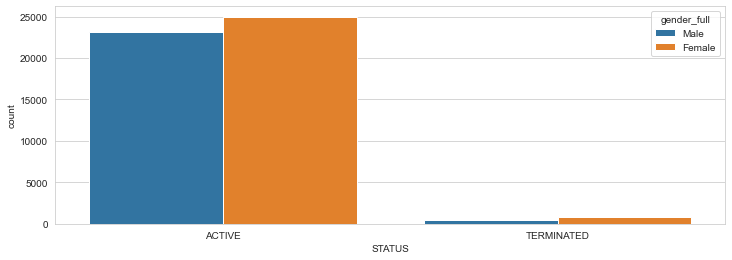

In [264]:
plt.figure(figsize=(12,4))
sns.countplot(x=df.STATUS, hue=df.gender_full)

Jumlah karyawan ACTIVE dan TERMINATED yang bergender Female lebih banyak dibandingkan dengan karyawan bergender Male

## Karyawan Resign

In [265]:
terminated = df[df.STATUS == 'TERMINATED']

#### Alasan Resign

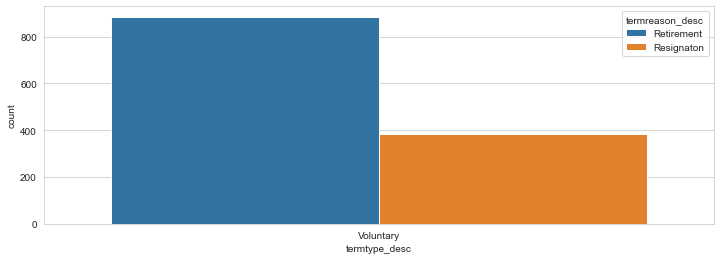

In [266]:
plt.figure(figsize=(12,4))
sns.countplot(x=terminated.termtype_desc, hue=terminated.termreason_desc)

Jumlah karyawan yang berhenti dengan alasan Retirement lebih besar dibandingkan dengan alasan Resignation

#### Usia Karyawan Yang Sudah Berhenti

In [267]:
retire = terminated[terminated.termreason_desc == 'Retirement']
resign = terminated[terminated.termreason_desc != 'Retirement']

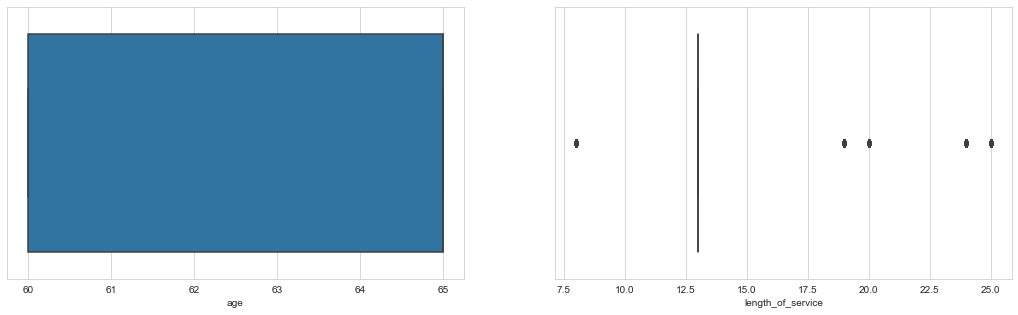

In [268]:
f,axs = plt.subplots(1,2,figsize=(18,5))
sns.boxplot(x=retire['age'],ax=axs[0])
sns.boxplot(x=retire['length_of_service'],ax=axs[1])

In [269]:
print(f'Rata-rata umur karyawan yang telah berhenti dengan alasan Retirement adalah {round(retire.age.mean(),2)} tahun')
print(f'Rata-rata lama bekerja karyawan yang telah berhenti dengan alasan Retirement adalah {round(retire.length_of_service.mean(),2)} tahun')

Rata-rata umur karyawan yang telah berhenti dengan alasan Retirement adalah 63.34 tahun
Rata-rata lama bekerja karyawan yang telah berhenti dengan alasan Retirement adalah 14.15 tahun


##### Terdapet outliers pada feature lengt_of_service untuk karyawan yang TERMINATED dengan alasan Retirement, namun data outliers tersebut akan tetap digunakan

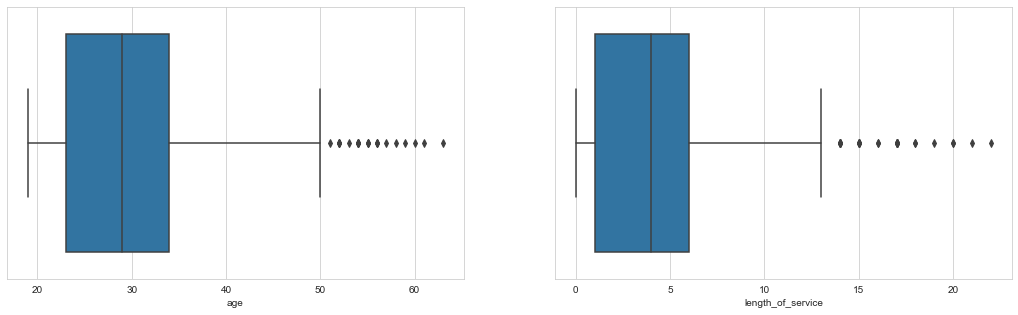

In [270]:
f,axs = plt.subplots(1,2,figsize=(18,5))
sns.boxplot(x=resign['age'],ax=axs[0])
sns.boxplot(x=resign['length_of_service'],ax=axs[1])

In [271]:
print(f'Rata-rata umur karyawan yang telah berhenti dengan alasan Resignation adalah {round(resign.age.mean(),2)} tahun')
print(f'Rata-rata lama bekerja karyawan yang telah berhenti dengan alasan Resignation adalah {round(resign.length_of_service.mean(),2)} tahun')

Rata-rata umur karyawan yang telah berhenti dengan alasan Resignation adalah 30.1 tahun
Rata-rata lama bekerja karyawan yang telah berhenti dengan alasan Resignation adalah 4.64 tahun


Karyawan yang berhenti karena alasan Retirement cenderung memiliki umur yang lebih tua dan masa kerja yang lebih lama dibandingkan karyawan yang berhenti karena Resignment

#### Gender Karyawan Yang Berhenti

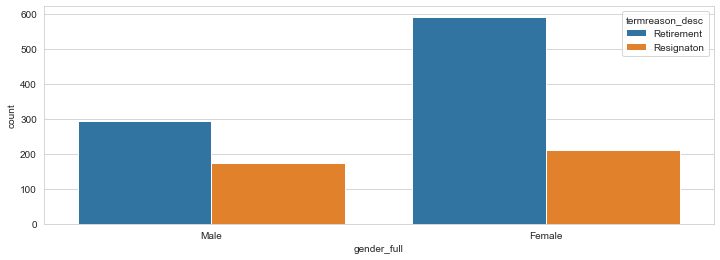

In [272]:
plt.figure(figsize=(12,4))
sns.countplot(x=terminated.gender_full, hue=terminated.termreason_desc)

In [273]:
(pd.crosstab(terminated['gender_full'],terminated['termreason_desc'],normalize='index')*100).round(2)

termreason_desc,Resignaton,Retirement
gender_full,,
Female,26.31,73.69
Male,37.18,62.82


- Jumlah karyawan bergender Female yang berhenti karena Retirement jauh lebih banyak dibandingkan karyawan bergender Male.
- Jumlah karyawan bergender Female yang berhenti karena Resignation lebih banyak dibandingkan karyawan bergender Male namun selisihnya tidak terlalu besar.
- Presentase karyawan bergender Female yang berhenti karena Retirement adalah 73% sedangkan Resignation 26%
- Presentase karyawan bergender Male yang berhenti karena Retirement adalah 62% sedangkan Resignation 37%
- karyawan bergender Male cenderung berhenti dengan karena Resignation dibandingkan karyawan bergender Female

#### Lokasi Karyawan Yang Berhenti

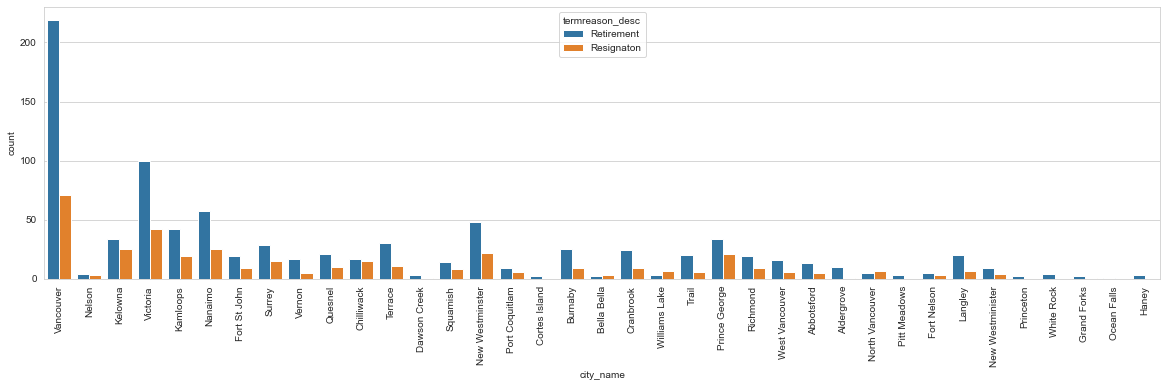

In [274]:
plt.figure(figsize=(20,5))
sns.countplot(x=terminated.city_name, hue=terminated.termreason_desc)
plt.xticks(rotation=90)
plt.show()

Hampir seluruh kota, jumlah karyawan berhenti dikarenakan Resignment lebih banyak dibanginkan dengan Resignation, kecuali di kota North Vancouver

#### Pekerjaan Karyawan Yang Berhenti

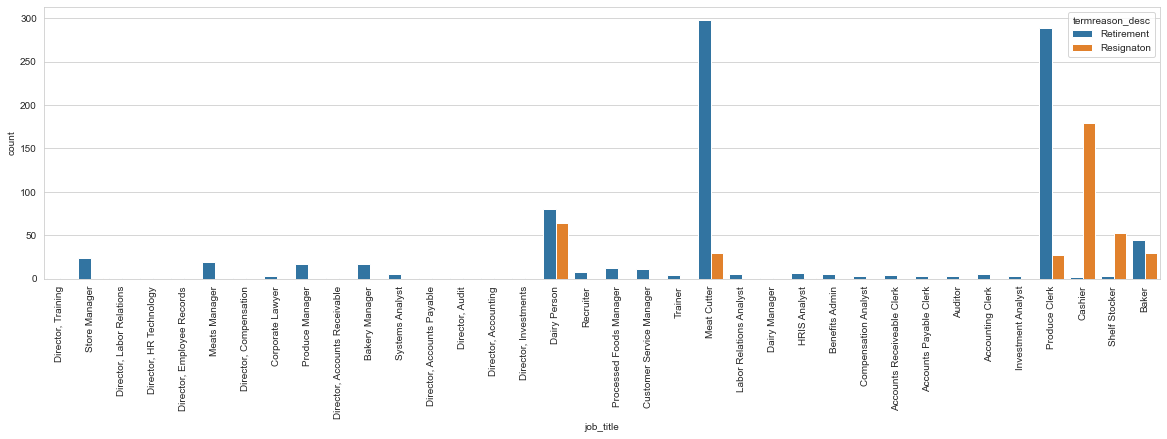

In [275]:
plt.figure(figsize=(20,5))
sns.countplot(x=terminated.job_title, hue=terminated.termreason_desc)
plt.xticks(rotation=90)
plt.show()

Pekerjaan Cashier dan Shelf Stocker memiliki jumlah karyawan yang berhenti karena Resignation lebih banyak dibandingkan karena Retirement

In [293]:
(pd.crosstab(terminated.BUSINESS_UNIT, terminated.termreason_desc,normalize='index')*100).round(2)

termreason_desc,Resignaton,Retirement
BUSINESS_UNIT,,
HEADOFFICE,1.45,98.55
STORES,31.97,68.03


Karyawan yang bekerja di HEADOFFICE cenderung berhenti karena Retirement. Sedangkan di STORES 32% karyawan yang berhenti dikarenakan Resignation

In [301]:
terminated[terminated.BUSINESS_UNIT == 'HEADOFFICE'].city_name.unique()

array(['Vancouver'], dtype=object)

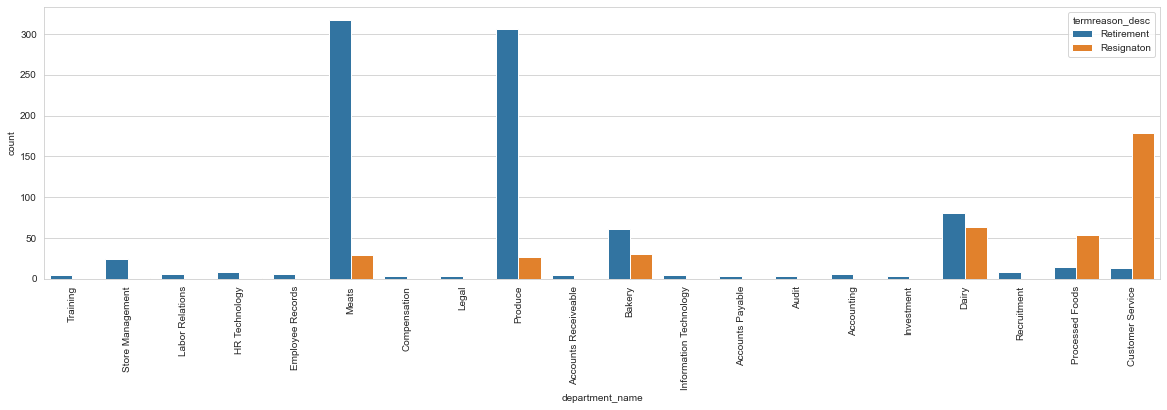

In [305]:
plt.figure(figsize=(20,5))
sns.countplot(x=terminated.department_name, hue=terminated.termreason_desc)
plt.xticks(rotation=90)
plt.show()

Jumlah karyawan yang berhenti dengan alasan Retirement paling banyak berada di department Meats. Sedangkan yang berhenti dengan alasan Resignation berada di department Customer Services.

## Feature Selection dan Engineering

Mengeluarkan kolom yang sudah jelas tidak digunakan dalam Machine Learning

In [369]:
data = df.drop(columns=['EmployeeID','recorddate_key','terminationdate_key','birthdate_key','orighiredate_key','gender_short','STATUS_YEAR','termtype_desc','termreason_desc'])

In [370]:
data.head(1)

,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,STATUS,BUSINESS_UNIT
0,52,17,Vancouver,Executive,CEO,35,Male,ACTIVE,HEADOFFICE


In [371]:
from dython.nominal import associations

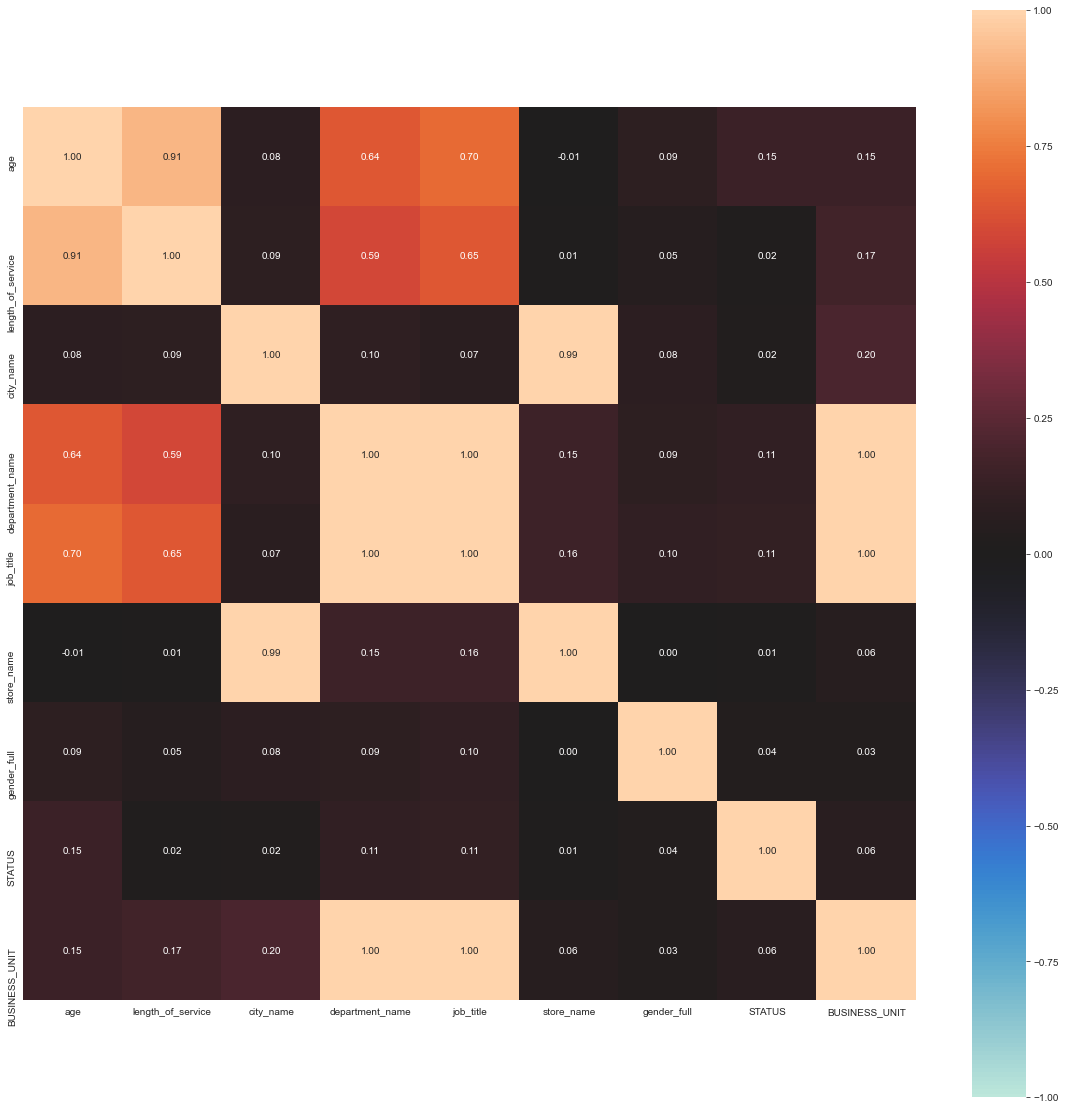

{'corr':                         age  length_of_service  city_name  department_name  \
 age                1.000000           0.909192   0.082891         0.644468   
 length_of_service  0.909192           1.000000   0.091736         0.587402   
 city_name          0.082891           0.091736   1.000000         0.095342   
 department_name    0.644468           0.587402   0.095342         1.000000   
 job_title          0.695364           0.646258   0.070706         0.999737   
 store_name        -0.005394           0.011089   0.994483         0.149892   
 gender_full        0.093264           0.047308   0.083297         0.089207   
 STATUS             0.146141           0.021513   0.024970         0.105724   
 BUSINESS_UNIT      0.145300           0.167098   0.200178         0.999808   
 
                    job_title  store_name  gender_full    STATUS  BUSINESS_UNIT  
 age                 0.695364   -0.005394     0.093264  0.146141       0.145300  
 length_of_service   0.646258    0.0

In [372]:
associations(data,figsize=(20,20))

Age dan length_of_service memiliki nilai asosiasi yang kuat antar feature. Karena semakin tinggi length_of_service maka nilai age juga akan semakin besar.

city_name dan store_name juga memiliki asosiasi yang tinggi, karena masing-masing city_name memiliki store_name yang berbeda

In [373]:
data = data.drop(columns=['age','store_name','city_name'])

In [374]:
from sklearn.utils import resample

Data imbalance maka akan dilakukan oversampling

In [375]:
data_active = data[data.STATUS == 'ACTIVE']
data_resign = data[data.STATUS != 'ACTIVE']

In [376]:
resign_os = resample(data_resign,replace=True,n_samples=len(data_active),random_state=42)

In [377]:
clean = pd.concat([data_active,resign_os],axis=0)

In [379]:
clean.to_csv('cleanOS.csv',index=False)

#### to be continued.....